In [119]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as K
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [120]:
# モデルのパラメータを初期化する
K.clear_session()

In [121]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ラベルを付ける
y_train_even = y_train % 2
y_test_even = y_test % 2

# モデルを定義する
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルをコンパイルする
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# モデルをトレーニングする
model.fit(x_train, y_train_even, epochs=5)

# モデルを評価する
test_loss, test_acc = model.evaluate(x_test, y_test_even)

# 結果を出力する
print(f'テスト用データに対する損失: {test_loss:.4f}')
print(f'テスト用データに対する精度: {test_acc:.4f}')


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8732 - accuracy: 0.9428
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0885 - accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0649 - accuracy: 0.9787
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0964 - accuracy: 0.9766
テスト用データに対する損失: 0.0964
テスト用データに対する精度: 0.9766


In [122]:
intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                    outputs=model.layers[-2].output)
intermediate_output = intermediate_layer_model.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


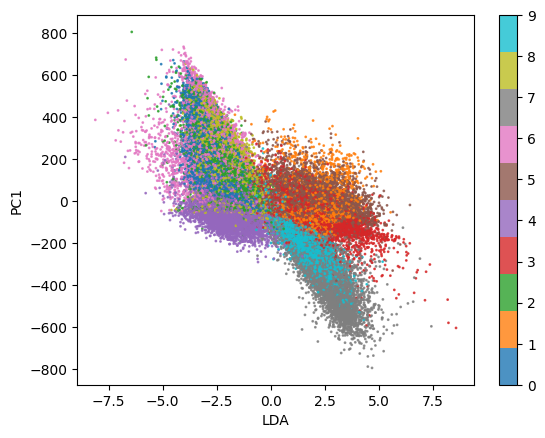

In [123]:
# PCAオブジェクトを作成し、fit_transform()メソッドで主成分分析を実行
pca = PCA(n_components=2)
pca_result = pca.fit_transform(intermediate_output)

# LDAオブジェクトを作成し、fit_transform()メソッドで線形判別分析を実行
lda = LDA(n_components=1)
lda_result = lda.fit_transform(intermediate_output, y_train_even)

plt.scatter(lda_result[:], pca_result[:, 0], c=y_train, cmap='tab10', alpha=0.8, s=1)
plt.xlabel('LDA')
plt.ylabel('PC1')

# カラーマップを取得してカラーバーとして表示
plt.colorbar()
plt.show()

In [124]:
import numpy as np

# 偶数クラスに属する数字の0だけ学習する画像数を少なくする
even_zero_indices = np.where(y_train == 0)[0]
x_train_zeroless = np.delete(x_train, even_zero_indices, axis=0)
y_train_zeroless = np.delete(y_train, even_zero_indices, axis=0)

# 奇数クラスの画像数を偶数クラスと同じにするためにランダムサンプルする
odd_indices = np.where(y_train == 1)[0]
random_odd_indices = np.random.choice(odd_indices, len(even_zero_indices), replace=False)
x_train = np.concatenate((x_train, x_train[random_odd_indices]), axis=0)
y_train = np.concatenate((y_train, y_train[random_odd_indices]), axis=0)

In [127]:
import numpy as np
from tensorflow.keras.datasets import mnist

# MNISTデータセットを読み込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ラベルに対応するインデックスを取得する
indices_train = [np.where(y_train == i)[0] for i in range(10)]
indices_test = [np.where(y_test == i)[0] for i in range(10)]

# データをラベルごとに分割する
data_train = [x_train[indices_train[i]] for i in range(10)]
data_test  = [x_test[indices_test[i]] for i in range(10)]

# わざと数字の0だけ枚数を減らす
reduction_number = 0
reduction_rate = 0.9
t = np.random.choice(len(data_train[reduction_number]), int(len(data_train[reduction_number])*(1-0.9)), replace=False)
data_train[reduction_number] = data_train[reduction_number][t]

# 偶数クラスの枚数と奇数クラスの枚数を揃えてデータセットを作る
num_even = 0
x_even_train = np.array([])
y_even_train = np.array([])
for i in range(0,10,2):
    num_even += len(data_train[i])
    l = np.ones(len(data_train[i]))*i
    y_even_train = np.concatenate([y_even_train, l])
    if x_even_train.size == 0:
        x_even_train = data_train[i]
    else:
        x_even_train = np.concatenate([x_even_train, data_train[i]])

num_odd = 0
x_odd_train = np.array([])
y_odd_train = np.array([])
for i in range(1,10,2):
    num_odd += len(data_train[i])
    l = np.ones(len(data_train[i]))*i
    y_odd_train = np.concatenate([y_odd_train, l])
    if x_odd_train.size == 0:
        x_odd_train = data_train[i]
    else:
        x_odd_train = np.concatenate([x_odd_train, data_train[i]])
indices = np.random.choice(num_odd, num_even, replace=False)
x_odd_train = x_odd_train[indices]
y_odd_train = y_odd_train[indices]

t = np.concatenate([x_even_train, x_odd_train])
t_indecies = np.random.choice(t.shape[0], t.shape[0], replace=False)
x_train_reduce = t[t_indecies]
t = np.concatenate([y_even_train, y_odd_train])
y_train_reduce = t[t_indecies]

y_train_even_reduce = y_train_reduce % 2

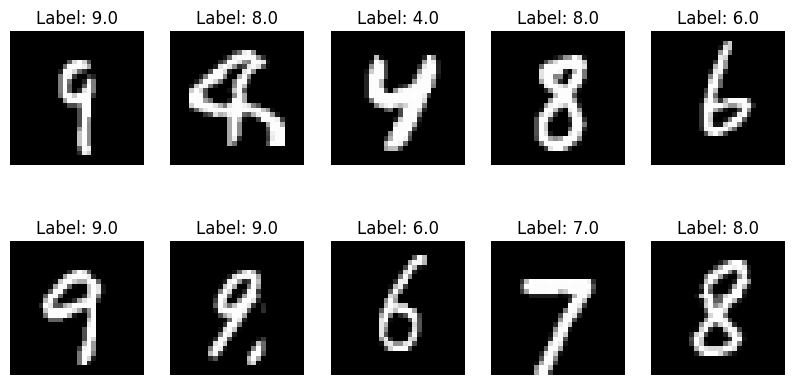

In [128]:
# ランダムに10枚の画像を抽出する
indices = np.random.choice(len(x_train_reduce), 10, replace=False)
images = x_train_reduce[indices]
labels = y_train_reduce[indices]

# 画像とラベルを表示する
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
    ax.axis('off')
plt.show()

In [129]:
# モデルのパラメータを初期化する
K.clear_session()

In [130]:
# モデルを定義する
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# モデルをコンパイルする
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# モデルをトレーニングする
model.fit(x_train_reduce, y_train_even_reduce, epochs=5)

# モデルを評価する
test_loss, test_acc = model.evaluate(x_test, y_test_even)

# 結果を出力する
print(f'テスト用データに対する損失: {test_loss:.4f}')
print(f'テスト用データに対する精度: {test_acc:.4f}')

Epoch 1/5
1511/1511 [==============================] - 11s 7ms/step - loss: 1.1737 - accuracy: 0.9362
Epoch 2/5
1511/1511 [==============================] - 10s 7ms/step - loss: 0.1043 - accuracy: 0.9671
Epoch 3/5
1511/1511 [==============================] - 11s 7ms/step - loss: 0.0718 - accuracy: 0.9762
Epoch 4/5
1511/1511 [==============================] - 10s 7ms/step - loss: 0.0689 - accuracy: 0.9777
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0776 - accuracy: 0.9763
テスト用データに対する損失: 0.0776
テスト用データに対する精度: 0.9763


In [131]:
intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                    outputs=model.layers[-2].output)
intermediate_output = intermediate_layer_model.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


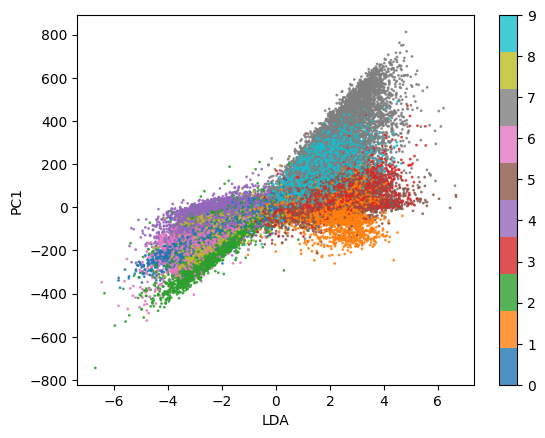

In [132]:
# PCAオブジェクトを作成し、fit_transform()メソッドで主成分分析を実行
pca = PCA(n_components=2)
pca_result = pca.fit_transform(intermediate_output)

# LDAオブジェクトを作成し、fit_transform()メソッドで線形判別分析を実行
lda = LDA(n_components=1)
lda_result = lda.fit_transform(intermediate_output, y_train_even)

plt.scatter(lda_result[:], pca_result[:, 0], c=y_train, cmap='tab10', alpha=0.8, s=1)
plt.xlabel('LDA')
plt.ylabel('PC1')

# カラーマップを取得してカラーバーとして表示
plt.colorbar()
plt.show()

In [133]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100609 (393.00 KB)
Trainable params: 100609 (393.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


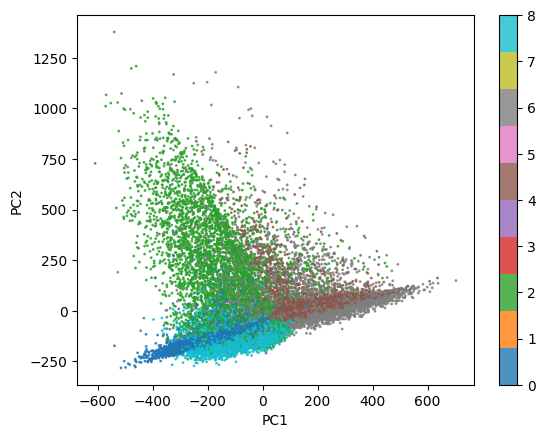

In [138]:
intermediate_output_even = intermediate_output[y_train % 2 == 0]
intermediate_output_even_label = y_train[y_train %2 == 0]

pca_result = pca.fit_transform(intermediate_output_even)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=intermediate_output_even_label, cmap='tab10', alpha=0.8, s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()